# SIT731 - Task 1P 
## Monique Senjaya, S224780456, [s224780456@deakin.edu.au](mailto:s224780456@deakin.edu.au), Postgraduate Student 

In this first task, we are required to showcase our ability to code in **Python** in a **Jupyter Notebook** environment. This exercise consists of simple python tasks like:
- Making lists
- Using for loop to execute functions on a set of data in a list
- Using for loop to print a series of strings (based on the results)
- Draw a bar plot using data from a given list
- Make use of extra parameters to change bar colours depending on its categories.

Other than showcasing technical coding skills, this task also covers our ability to analyze and discuss benefits and limitations of BMI calculations. This also includes comparing the two different ways of calculation and how it differs.

### Making lists
---
First, let's make a few lists consisting of basic data to be used in this task. We need to make sure that all the list has identical lengths. 

In [15]:
names = ["Abby", "Barry", "Carston", "Dennis", "Ella", "Felicia", "Garret"]
heights = [162, 183, 190, 175, 170, 159, 161] # in cenitimetres
weights = [41, 85, 70, 97, 60, 68, 69] # in kilograms

### Making a function to calculate BMI and New BMI
---

After initializing the lists, we can use it to calculate each person's BMI using a formula. To make it neater, let's make a function `calculate_BMI` that takes in two parameters `weight` and `height` and returns the BMI using the formula `weight (in kg) / (height (in m))**2`. We will also make a third optional parameter called `new` that is a boolean. This is used to differentiate which formula we will be using. If the `new` is true, we will be using a new bmi formula (exponent of 2.5) `1.3 * weight (in kg) / (height (in m))**2.5`.


In [26]:
def calculate_BMI(weight, height, new = False):
    """
    A function to calculate the BMI based 
    on the given inputs of weight in Kg and 
    height in cms.
    """
    if new == False:
        return weight / (height/100)**2
    elif new == True:
        return 1.3 * (weight / (height/100)**2.5)



### Using the function to calculate BMI
---
Once the function is made, let's construct a for loop that loops through the list and calculate the respective BMIs for each person. We will be making use of **indexes** to make sure that the data corresponds to the right person. When the BMI is calculated, we will store the result in a new list called `bmi`. Make sure that we use the `round` function to make the result into 2 sf. 

In [29]:
bmi = [] # Initialize the list for storing the results
new_bmi = []

for i in range(len(names)): # Loop through the range of the length of the list names
    bmi.append(round(calculate_BMI(weights[i], heights[i], new = False),2)) # use the current index value to extract corresponding values
    new_bmi.append(round(calculate_BMI(weights[i], heights[i], new = True),2)) # new formula

bmi
new_bmi

[15.96, 24.39, 18.29, 31.13, 20.7, 27.73, 27.27]

### Using print formatting to display data
---

As we can see, the BMI is stored accordingly in the `bmi` list. This, however, is not user friendly. It's just numbers that doesn't mean much on its own. The next step we'll do is printing a series of strings so that the numbers can actually be understood correctly. We will also put the numbers into categories to further enhance the description of data. We will be doing this using another for loop and if-else statements.

To make the code more efficient, we will include another list of colors based on their categories. This will be very useful for the next task of plotting a bar graph.

In [ ]:
bmi_categories = []
colors = []

for i in range(len(names)):
    if bmi[i] < 18.5: # use if to filter and categorize the data
        bmi_category = "underweight"
        colors.append("paleturquoise")
    elif bmi[i] < 25.0:
        bmi_category = "normal"
        colors.append("limegreen")
    elif bmi[i] < 30.0:
        bmi_category = "overweight"
        colors.append("darkorange")
    else: # use else when dealing with "any other options"
        bmi_category = "obese"
        colors.append("tomato")

    bmi_categories.append(bmi_category)
    
    print (f"{names[i]} has BMI of {bmi[i]} which is {bmi_category}. The new BMI index is {new_bmi[i]}.") # make use of format printing

Abby has BMI of 15.62 which is underweight. The new BMI index is 15.96
Barry has BMI of 25.38 which is overweight. The new BMI index is 24.39
Carston has BMI of 19.39 which is normal. The new BMI index is 18.29
Dennis has BMI of 31.67 which is obese. The new BMI index is 31.13
Ella has BMI of 20.76 which is normal. The new BMI index is 20.7
Felicia has BMI of 26.9 which is overweight. The new BMI index is 27.73
Garret has BMI of 26.62 which is overweight. The new BMI index is 27.27


### Plotting a bar graph
---
After using the formating print, users will be able to understand the data better. We can still improve this, though, by plotting a bar graph to show the BMI of each person. This can also be further enhanced by making different colors for different BMI categories. Let's do that with matplotlib.

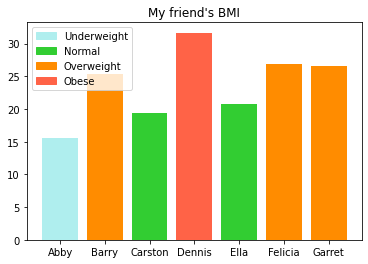

In [14]:
import matplotlib.pyplot as plt # importing basic plotting library
import matplotlib.patches as mpatches 

plt.bar(names, bmi, color = colors)
plt.title("My friend's BMI")

under = mpatches.Patch(color='paleturquoise', label='Underweight') 
norm = mpatches.Patch(color='limegreen', label='Normal') 
over = mpatches.Patch(color='darkorange', label='Overweight') 
obese = mpatches.Patch(color='tomato', label='Obese') 

plt.legend(handles=[under, norm, over, obese])
plt.show()

The bar graph above clearly shows everyone's BMIs and their categories, complete with the color legends. Plotting this graph really brings out the full potential of the given data. 

### Benefits and limitations of BMI
---

BMI is often used because it's a quick and consistent way to estimate an individual's weight category. From a medical perspective, it helps classify people as underweight, normal weight, overweight, or obese, which can be useful in identifying potential health risks such as heart disease, diabetes, and high blood pressure. Since it only requires height and weight, it is a convenient tool for doctors and researchers to assess large groups of people without expnsive tests. It provides a rough estimate of health trends, making it an efficient screening tool, though not a perfect one.

However, BMI has several limitations because it does not take body composition into account. Muscle is denser than fat, meaning that athletes and individuals with high muscle mass may have a BMI that classifies them as overweight or even obese, despite being physically fit. On the other hand, someone with little muscle and a high percentage of body fat might fall within the "normal weight" range but still be at risk for serious health conditions. BMI also does not consider factors like bone density, fat distribution, or body shape, all of which play a significant role in overall health. Because of these flaws, relying solely on BMI for medical diagnoses or health assessments can be misleading.

After evaluating the limitations of BMI calculations, researchers have now propose an improved BMI formula that raises weight to an exponent of 2.5 instead of the traditional 2. This adjustment helps account for the fact that weight does not always scale proportionally to height squared, particularly for taller individuals who may be unfairly categorized as overweight under the original formula. This formula is a little more accurate when used to reflect various body composition.

Beyond medicine, BMI is frequently used in workplaces, insurance policies, and schools to assess health, sometimes leading to discrimination and stigma. People labeled as "overweight" or "obese" may face unfair bias, even if they are healthy, while those with a "normal" BMI might mistakenly believe they are in good health despite potential health issues. Moreover, BMI has been misused to promote unrealistic beauty standards, pressuring individuals into unhealthy dieting, eating disorders, and body image struggles.

While BMI can be a helpful tool when used correctly in the right context, it should never be used to judge someone's health solely by their BMI numbers. Newer calculations, like the exponent 2.5 formula, have improved in accuracy, but no single number can fully categorize a person’s well-being.

### Conclusion
---

In conclusion, BMI is a useful tool because it is quick and easy to use. But, it has many flaws. It doesn't consider muscle, fat distribution, or body shape. This can lead to misleading results. The new formula using an exponent of 2.5 attempts to improve accurace, but it still shouldn't be the only way to measure health. A person's well-being depends on a lot of factors like fitness level, diet, and overall lifestyles.

The code also categorizes BMI values into underweight, normal, overweight, and obese, assigning different colors to each group for a visual representation. This highlights one of BMI’s biggest issues. People with high muscle mass may still fall into the overweight or obese category even if they are healthy. The visualization makes it clear that BMI alone is not always a fair measure. In the future, similar programs could incorporate more health factors, such as body fat percentage or waist-to-height ratio, to provide a better picture of overall health. While BMI can still be useful, we should always look at the bigger picture and avoid using it as the only way to judge health.